In [1]:
# przetwarzanie danych
import numpy as np
import pandas as pd

# przekształcanie – normalizacja danych
from sklearn.preprocessing import MinMaxScaler

# wizualizacja
import matplotlib.pyplot as plt

# sieci neuronowe
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU

# ewaluacja modelu
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('C:\\Users\\DELL\\Downloads\\airline-passengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index(['Month'], inplace=True)
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


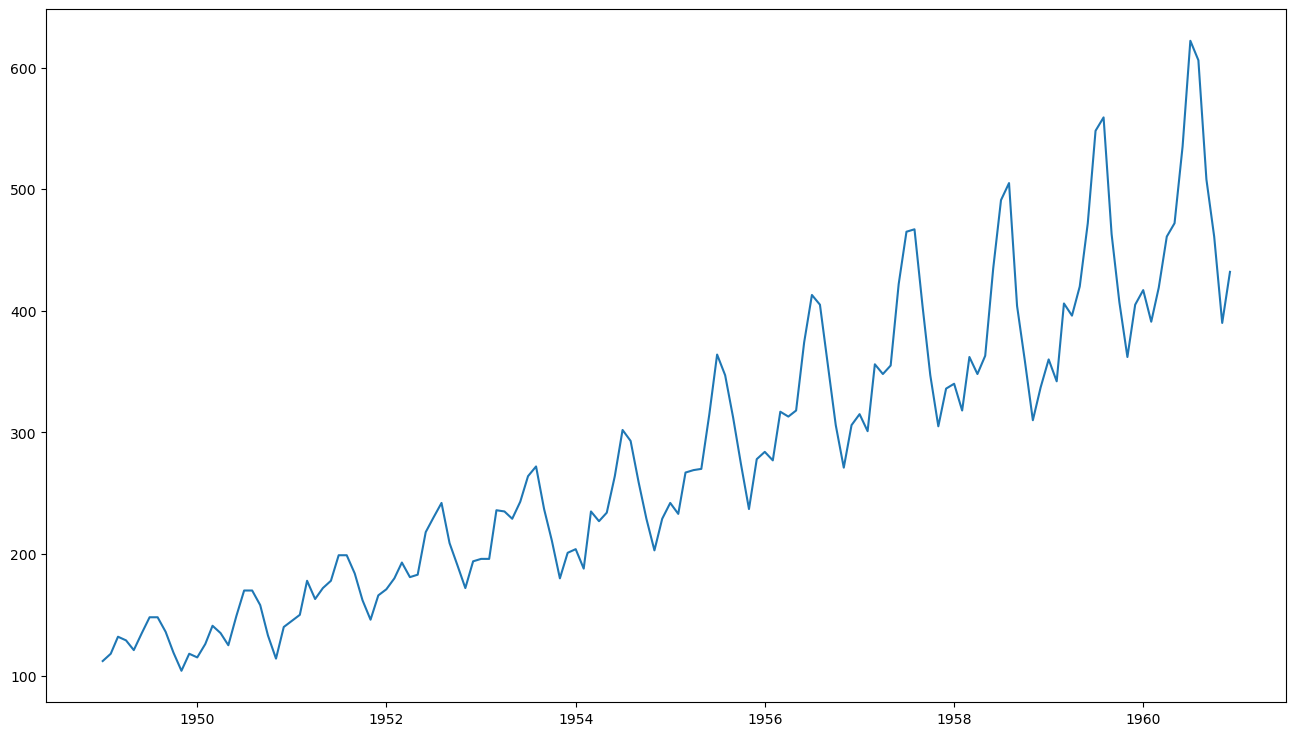

In [3]:
plt.figure(figsize=(16,9))
plt.plot(dataset['Passengers'])
plt.show()

In [4]:
train_size = int(len(dataset) * 0.70)
scaler = MinMaxScaler(feature_range=(0, 1))
look_back = 3
def create_dataset(df, train_size, lback=look_back, scaler_function=scaler):
    test_size = len(df) - train_size
    train, test = df[0:train_size,:].copy(), df[train_size:len(df),:].copy()
    train = scaler_function.fit_transform(train)
    test = scaler_function.transform(test)
    X_train, X_test, y_train, y_test = [], [], [], []

    # Tworzenie zbioru treninowego
    for i in range(len(train)-lback-1):
        a = train[i:(i+lback), 0]
        X_train.append(a)
        y_train.append(train[i + lback, 0])

    # Tworzenie zbioru testowego
    for i in range(len(test)-lback-1):
        a = test[i:(i+lback), 0]
        X_test.append(a)
        y_test.append(test[i + lback, 0])

    X_train, X_test = np.array(X_train), np.array(X_test)
    X_train, X_test = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    y_train, y_test = np.array(y_train), np.array(y_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_dataset(df=np.array(dataset), train_size=train_size, lback=look_back)

In [5]:
X_train[:3]

array([[[0.02588997, 0.04530744, 0.09061489]],

       [[0.04530744, 0.09061489, 0.08090615]],

       [[0.09061489, 0.08090615, 0.05501618]]])

In [6]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(5, input_shape=(1, look_back)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1.1525
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3351
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2554
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1251
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0933  
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0878
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0538
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0581
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0449
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0349
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0404
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0324
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246
Ep

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step


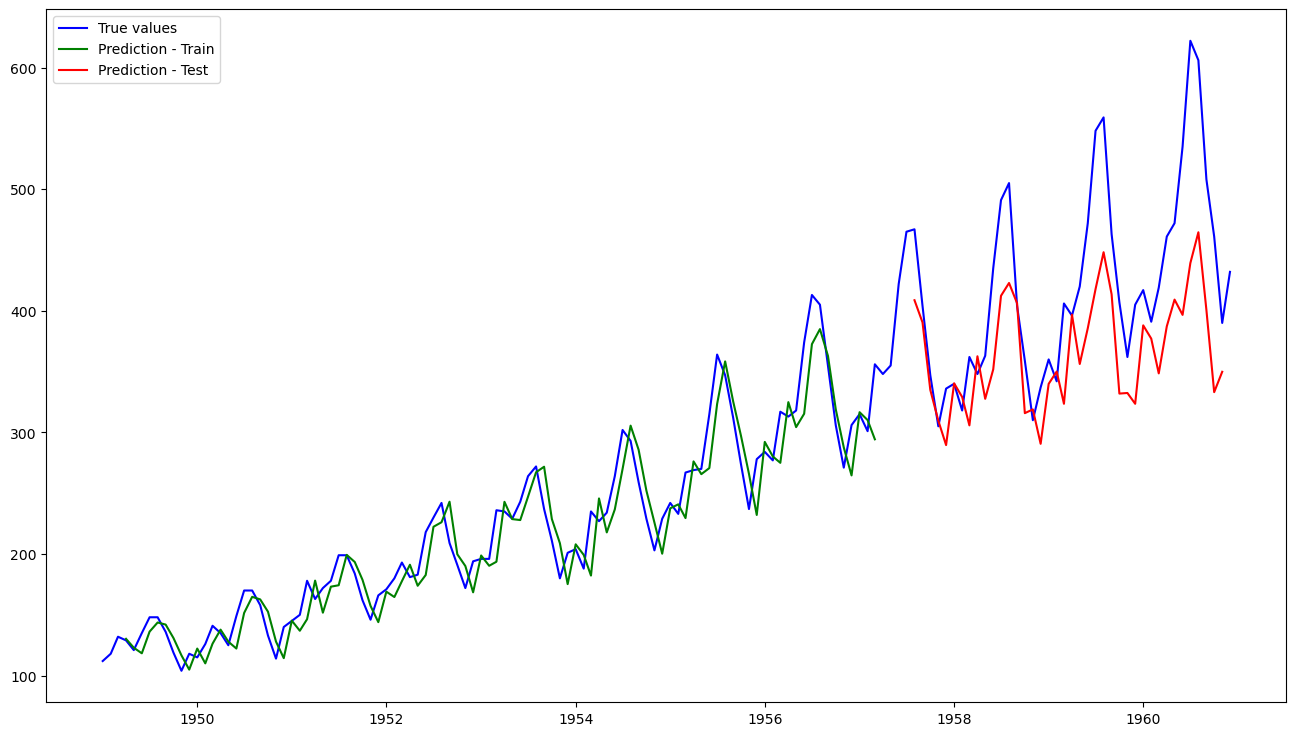


RMSE TEST: 73.43419815380928


In [7]:
def backtests(model, lback=look_back):

    # predykcja - train
    prediction_train = scaler.inverse_transform(model.predict(X_train))
    prediction_train = pd.Series(prediction_train.flatten(),
                                index=dataset.index[lback:len(prediction_train)+lback])

    # predykcja - test
    prediction_test = scaler.inverse_transform(model.predict(X_test))
    prediction_test = pd.Series(prediction_test.flatten(),
                                index=dataset.index[len(prediction_train)+(2*lback)+1:len(dataset)-1])

    # wizualizacja prognozy
    plt.figure(figsize=(16,9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(prediction_train, color='green', label='Prediction - Train')
    plt.plot(prediction_test, color='red', label='Prediction - Test')
    plt.legend(loc='upper left')
    plt.show()

    # obliczenie RMSE
    rmse = mean_squared_error(dataset.loc[prediction_test.index, :], prediction_test) ** 0.5
    print(f'\nRMSE TEST: {rmse}')

backtests(model_rnn)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2070
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0764
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087
Epoc

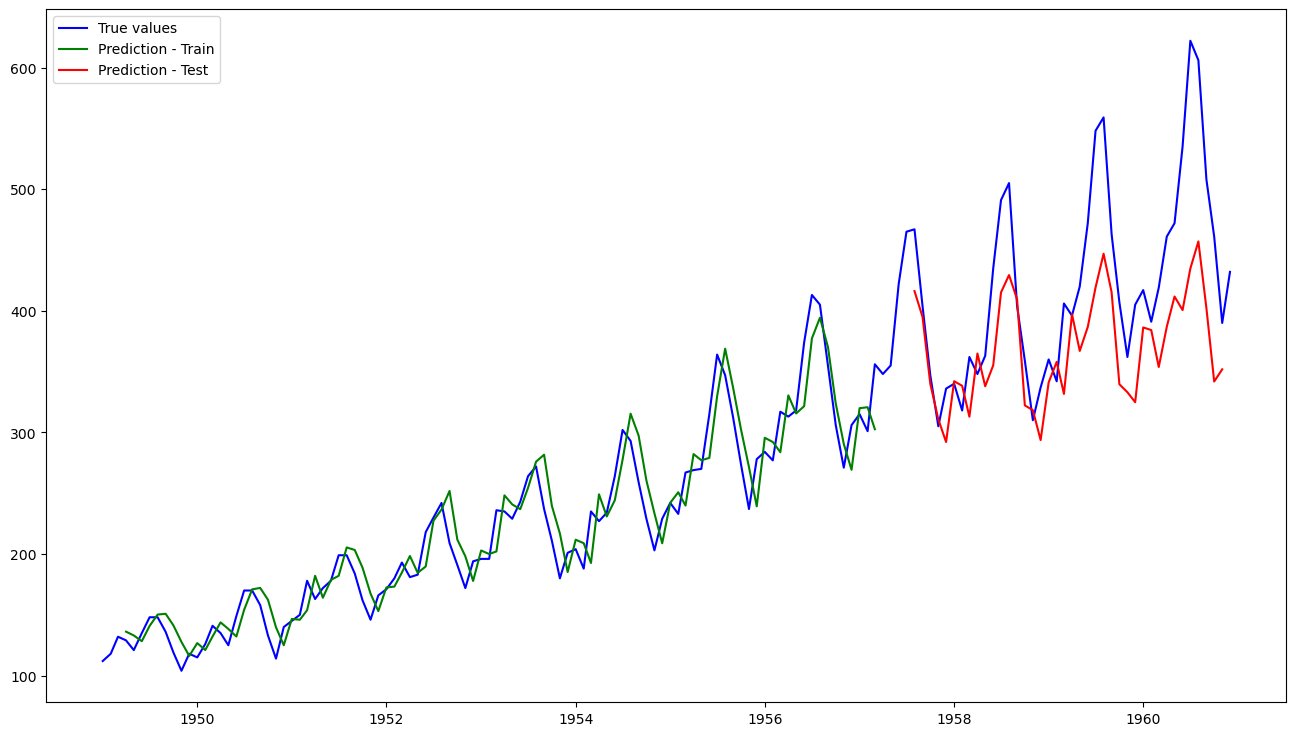


RMSE TEST: 71.70179894550031


In [8]:
model_lstm = Sequential()
model_lstm.add(LSTM(5, input_shape=(1, look_back)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)
backtests(model_lstm)

Epoch 1/200


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1920
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091
Epoch 16/200
96

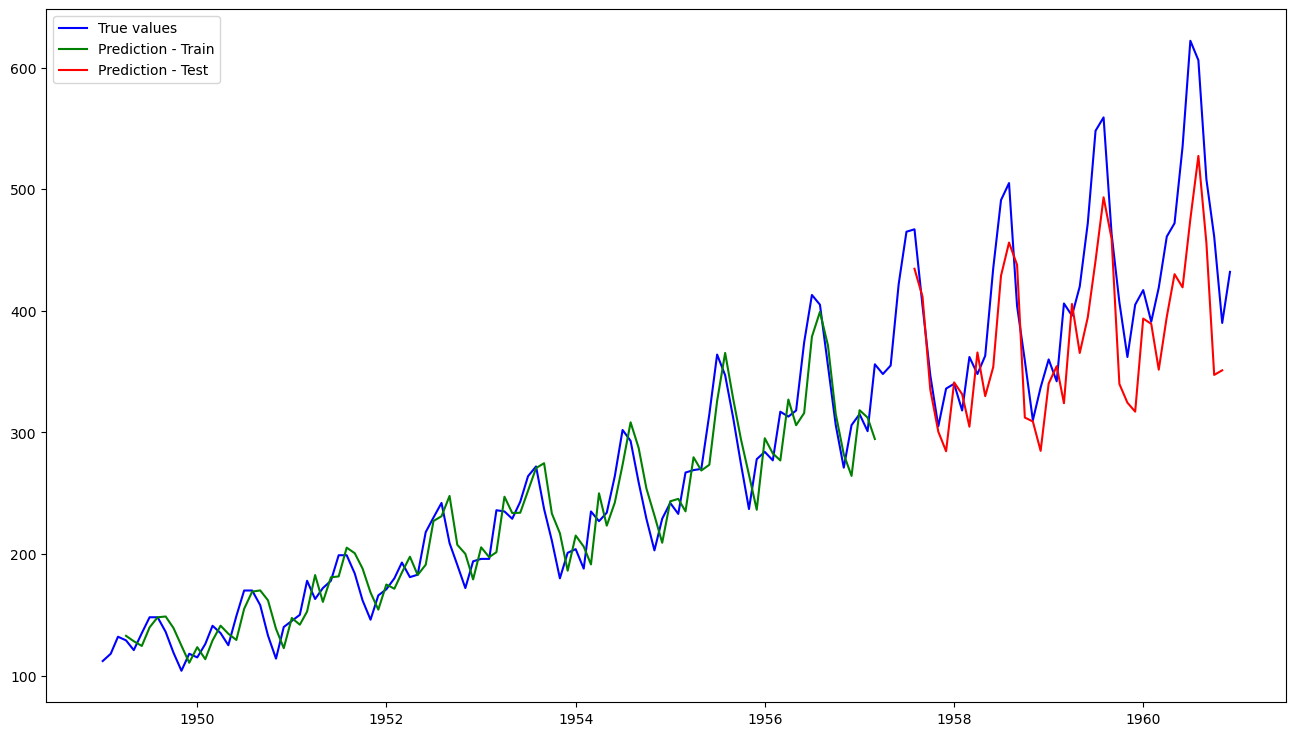


RMSE TEST: 59.77373008967255


In [9]:
model_gru = Sequential()
model_gru.add(GRU(5, input_shape=(1, look_back)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)
backtests(model_gru)

Forecast vs True Values

Adjusting Dataset Creation and Backtest Functions

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense

# Load and preprocess data
dataset = pd.read_csv(r'C:\Users\DELL\Downloads\airline-passengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index('Month', inplace=True)

# Split the data
train_size = int(len(dataset) * 0.70)
val_size = int(train_size * 0.15)  # 15% of training data for validation
scaler = MinMaxScaler(feature_range=(0, 1))

# Create Dataset Function (with validation)
def create_dataset(df, train_size, val_size, lback=1):
    df = df.values.reshape(-1, 1)
    train, test = df[:train_size], df[train_size:]

    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)

    X_train, X_val, X_test, y_train, y_val, y_test = [], [], [], [], [], []

    # Create training and validation sets
    for i in range(len(train_scaled) - lback - 1):
        a = train_scaled[i:(i + lback), 0]
        if i < train_size - val_size - lback - 1:
            X_train.append(a)
            y_train.append(train_scaled[i + lback, 0])
        else:
            X_val.append(a)
            y_val.append(train_scaled[i + lback, 0])

    # Create test set
    for i in range(len(test_scaled) - lback - 1):
        a = test_scaled[i:(i + lback), 0]
        X_test.append(a)
        y_test.append(test_scaled[i + lback, 0])

    # Reshape inputs to be [samples, time steps, features]
    X_train = np.reshape(np.array(X_train), (len(X_train), 1, lback))
    X_val = np.reshape(np.array(X_val), (len(X_val), 1, lback))
    X_test = np.reshape(np.array(X_test), (len(X_test), 1, lback))
    
    return X_train, X_val, X_test, np.array(y_train), np.array(y_val), np.array(y_test)

# Create training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = create_dataset(dataset['Passengers'], train_size, val_size)


In [11]:
X_train[:3]

array([[[0.02588997]],

       [[0.04530744]],

       [[0.09061489]]])

Hyperparameter Tuning with Loops

In [12]:
from keras.layers import Input

def build_gru_model(units, look_back):
    model = Sequential()
    model.add(Input(shape=(1, look_back)))  # Explicit Input layer
    model.add(GRU(units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Grid search for best hyperparameters
best_rmse = float('inf')
best_model = None
best_look_back = None
best_units = None

for look_back in range(1, 13):
    X_train, X_val, X_test, y_train, y_val, y_test = create_dataset(dataset['Passengers'], train_size, val_size, look_back)
    
    for units in range(1, 13):
        model = build_gru_model(units, look_back)
        model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

        # Evaluate on validation set
        val_pred = model.predict(X_val)
        val_pred_inverse = scaler.inverse_transform(val_pred)
        val_true_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))
        rmse = np.sqrt(mean_squared_error(val_true_inverse, val_pred_inverse))

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_look_back = look_back
            best_units = units

print(f"Best RMSE: {best_rmse} with look_back={best_look_back} and units={best_units}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/ste

Visualizing Predictions vs True Values

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Train Prediction Shape: (72, 1)
Test Prediction Shape: (31, 1)
Train Prediction Index Length: 72
Test Prediction Index Length: 31
Train Prediction Index: DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1

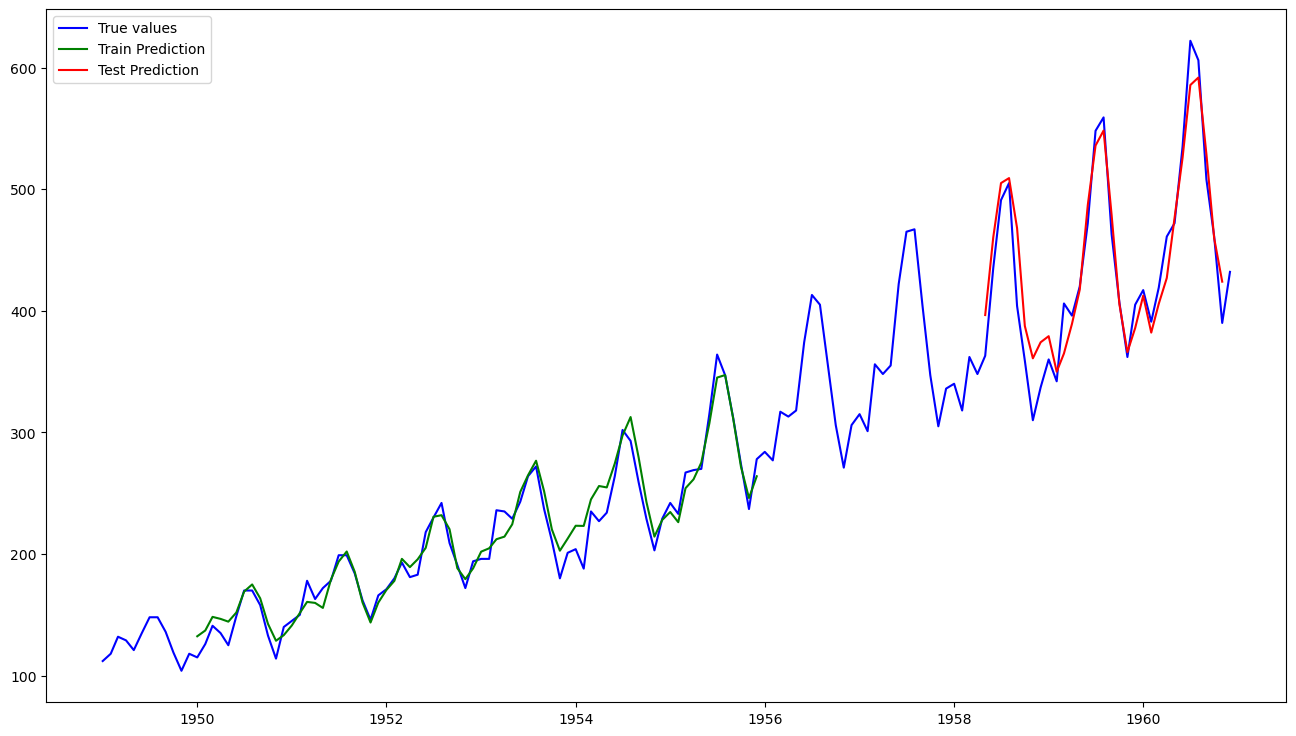

In [13]:
def plot_predictions(model, X_train, X_test, look_back, dataset, scaler):
    # Train predictions
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler.inverse_transform(train_pred)

    # Ensure correct indexing for train predictions
    train_pred_series = pd.Series(train_pred_inverse.flatten(), index=dataset.index[look_back:look_back + len(train_pred_inverse)])

    # Test predictions
    test_pred = model.predict(X_test)
    test_pred_inverse = scaler.inverse_transform(test_pred)

    # Ensure correct indexing for test predictions
    test_index_start = train_size + look_back
    test_pred_series = pd.Series(test_pred_inverse.flatten(), index=dataset.index[test_index_start:test_index_start + len(test_pred_inverse)])

    # Debugging the index and prediction shapes
    print(f"Train Prediction Shape: {train_pred_inverse.shape}")
    print(f"Test Prediction Shape: {test_pred_inverse.shape}")
    
    # Check index lengths
    print(f"Train Prediction Index Length: {len(dataset.index[look_back:look_back + len(train_pred_inverse)])}")
    print(f"Test Prediction Index Length: {len(dataset.index[test_index_start:test_index_start + len(test_pred_inverse)])}")
    
    # Print the index ranges themselves
    print(f"Train Prediction Index: {dataset.index[look_back:look_back + len(train_pred_inverse)]}")
    print(f"Test Prediction Index: {dataset.index[test_index_start:test_index_start + len(test_pred_inverse)]}")

    # Plot the results
    plt.figure(figsize=(16, 9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(train_pred_series, color='green', label='Train Prediction')
    plt.plot(test_pred_series, color='red', label='Test Prediction')
    plt.legend(loc='upper left')
    plt.show()

# Plot predictions using the best model
plot_predictions(best_model, X_train, X_test, best_look_back, dataset, scaler)
